np_ave:  0.5148538451677968
ave_filter:  0.5148538451677962
SNR:  1.0870944468718093e-16
M_A_filter:  1.0093450198579588


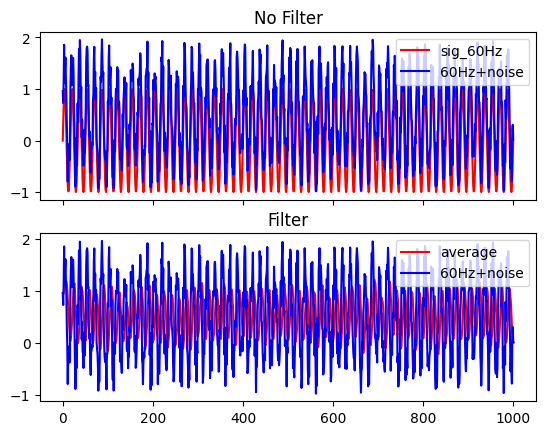

In [14]:
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style

t = np.linspace(0,1.0,1001)
sig_60Hz = np.sin(2*np.pi*60*t) #60Hz
noise=np.random.rand(1001) #noise
sig_60_noise=sig_60Hz + noise #60Hz+noise
snr = sum(sig_60Hz) / sum(noise) #그냥 SNR 값

#평균필터
aaa=0
prev_average=0.0
sample = 0

for i in range(0,1001,1):
    sample = i + 1
    alpha = (sample - 1) / (sample)
    average = alpha * prev_average + (1 - alpha) * sig_60_noise[i]
    prev_average = average
    aaa = average
    
a=np.mean(sig_60_noise) # 평균
print('np_ave: ',a) #np이용한 평균
print('ave_filter: ',aaa)#평균필터 이용한 평균



#이동 평균 필터
x_meas_save=[]
x_avg_save=[]
x_meas_save=[0]*1002
x_avg_save=[0]*1002

def mov_avg_filter(x_n, x_meas):
    n = len(x_n)
    for i in range(n-1):
        x_n[i] = x_n[i+1]
    x_n[n-1] = x_meas
    x_avg = np.mean(x_n)
    return x_avg, x_n

n=10

for i in range(1001):
    x_meas = sig_60_noise[i]
    if i==0:
        x_avg, x_n = x_meas, x_meas * np.ones(n)
    else:
        x_avg, x_n = mov_avg_filter(x_n, x_meas)
        
    x_meas_save[i] = x_meas
    x_avg_save[i] = x_avg


#그래프 출력
f,plt_arr = plt.subplots(2, sharex=True)

plt_arr[0].set_title('No Filter')
plt_arr[0].plot(sig_60Hz,color='red',label='sig_60Hz')
plt_arr[0].plot(sig_60_noise,color='blue',label='60Hz+noise')
plt_arr[0].legend(loc='upper right')

plt_arr[1].set_title('Filter')
plt_arr[1].plot(x_avg_save,color='red',label='average')
plt_arr[1].plot(sig_60_noise,color='blue',label='60Hz+noise')
plt_arr[1].legend(loc='upper right')

snr_1 = sum(sig_60Hz) / sum(noise) #그냥 SNR
snr_2 = sum(x_avg_save) / sum(sig_60_noise) #이동평균필터

print('SNR: ',snr_1)
print('M_A_filter: ',snr_2)
plt.show()